In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Dataset:  final_concentrated.csv

Source: WireHarness Machine Data
Test Scores with Number of errors per hour on different machines


Variables/Columns
Date: Day of work
Time: Number of hours and minutes the machine was working
Minutes: Number of minutes worked
Hours: Decimal value described the time worked by the machine in hours
Total_error: Total Number of error occurrances
Machine: Name of the machine

In [17]:
# Read the csv file into a pandas DataFrame
file_path = os.path.join('Resources','final_concentrated.csv')
machine_errors = pd.read_csv(file_path)
machine_errors.head()

,Date,Time,Minutes,Hours,Total_error,Machine
0,1/3/2018,4:40:00,280.0,4.67,270,Forty-six
1,2/3/2018,4:42:00,282.0,4.70,187,Forty-six
2,3/3/2018,6:10:00,370.0,6.17,182,Forty-six
3,4/3/2018,0:02:00,2.0,0.03,8,Forty-six
4,5/3/2018,4:45:00,285.0,4.75,237,Forty-six


In [18]:
# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = machine_errors["Hours"].values.reshape(-1, 1)
y = machine_errors["Total_error"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X
y

Shape:  (293, 1) (293, 1)


array([[270],
       [187],
       [182],
       [  8],
       [237],
       [111],
       [127],
       [166],
       [185],
       [153],
       [ 90],
       [205],
       [139],
       [224],
       [224],
       [177],
       [ 40],
       [250],
       [261],
       [219],
       [277],
       [184],
       [175],
       [200],
       [267],
       [221],
       [207],
       [ 95],
       [193],
       [173],
       [824],
       [ 35],
       [153],
       [128],
       [140],
       [121],
       [122],
       [192],
       [162],
       [158],
       [224],
       [179],
       [246],
       [187],
       [155],
       [180],
       [153],
       [122],
       [237],
       [836],
       [237],
       [237],
       [391],
       [296],
       [313],
       [365],
       [306],
       [ 40],
       [147],
       [152],
       [130],
       [195],
       [195],
       [ 89],
       [196],
       [152],
       [489],
       [243],
       [258],
       [417],
       [313],
      

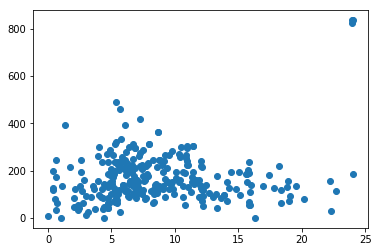

In [19]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [21]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [22]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [23]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 13213.0045296992
R-squared (R2 ): 0.032021416766747746


In [26]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.032021416766747746

In [27]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[3.35807652]]
y-axis intercept:  [137.04544237]


In [28]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.03]]
Max X Value: [[24.]]


In [30]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

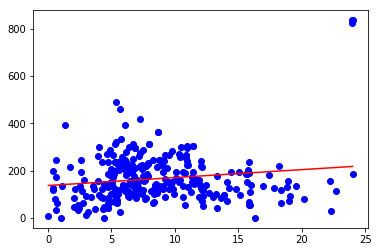

In [31]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION